<a href="https://colab.research.google.com/github/Lycher2/KSO/blob/main/fbprophet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import prophet
from datetime import datetime
from prophet import Prophet
from prophet.plot import plot_plotly

%matplotlib inline
warnings.filterwarnings('ignore')


Загружаем данные из txt примера

In [2]:
path = '/content/drive/MyDrive/Project_1/test.txt'
data = pd.read_csv(path, sep=",", header=None)
data.columns = ['open_time','open', 'high', 'low', 'close', 'volume']
data = data.astype({'open': np.float64,'high': np.float64, 'low': np.float64, 'close': np.float64, 'volume': np.float64})
data['normal_date'] = data['open_time'].apply(lambda x: datetime.fromtimestamp(x/1000))
data = data.reindex(columns=['normal_date','open', 'high', 'low', 'close', 'volume','open_time'])

In [3]:
data

,normal_date,open,high,low,close,volume,open_time
0,1970-01-16 23:38:15.240,122.00000,122.00000,122.00000,122.00000,0.100000,1381095240
1,1970-01-16 23:39:39.000,123.61000,123.61000,123.61000,123.61000,0.100000,1381179000
2,1970-01-16 23:40:01.080,123.91000,123.91000,123.90000,123.90000,1.991600,1381201080
3,1970-01-16 23:40:09.960,124.19000,124.19000,124.18000,124.18000,2.000000,1381209960
4,1970-01-16 23:41:51.000,124.01687,124.01687,124.01687,124.01687,1.000000,1381311000
...,...,...,...,...,...,...,...
2954378,1970-01-20 06:39:48.000,19120.00000,19120.00000,19116.60000,19119.90000,0.163557,1665588000
2954379,1970-01-20 06:39:48.060,19120.00000,19120.00000,19117.60000,19118.00000,0.475039,1665588060
2954380,1970-01-20 06:39:48.120,19118.00000,19120.00000,19118.00000,19120.00000,3.402014,1665588120
2954381,1970-01-20 06:39:48.180,19120.00000,19120.00000,19119.10000,19119.10000,0.048171,1665588180


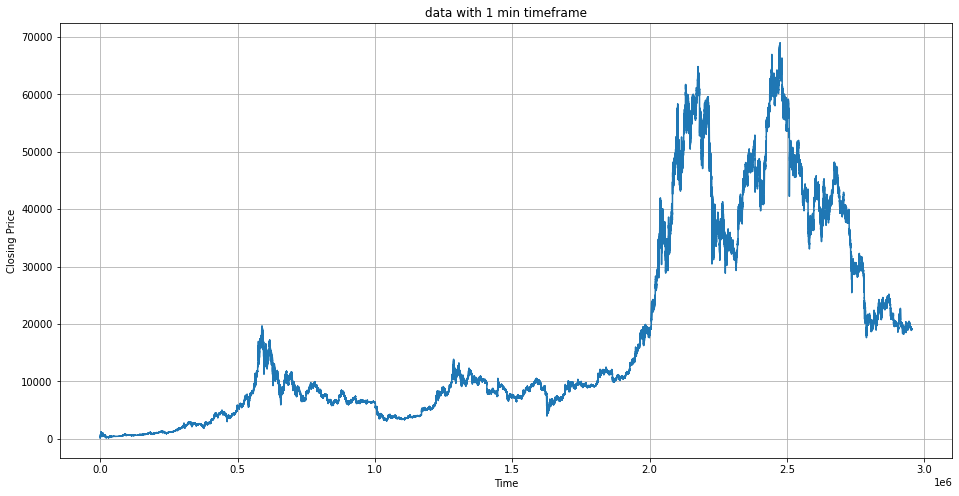

In [4]:
data['close'].plot(figsize=(16,8),title='data with 1 min timeframe',grid=True)
plt.xlabel('Time')
plt.ylabel('Closing Price')
plt.show()

In [7]:
test = pd.DataFrame(data[['normal_date', 'close']])
test.columns = ['ds','y']
test

,ds,y
0,1970-01-16 23:38:15.240,122.00000
1,1970-01-16 23:39:39.000,123.61000
2,1970-01-16 23:40:01.080,123.90000
3,1970-01-16 23:40:09.960,124.18000
4,1970-01-16 23:41:51.000,124.01687
...,...,...
2954378,1970-01-20 06:39:48.000,19119.90000
2954379,1970-01-20 06:39:48.060,19118.00000
2954380,1970-01-20 06:39:48.120,19120.00000
2954381,1970-01-20 06:39:48.180,19119.10000


In [8]:
pred = prophet.Prophet()

In [9]:
m = Prophet(changepoint_prior_scale=0.01).fit(test)
future = m.make_future_dataframe(periods=300, freq='H')
fcst = m.predict(future)
fig = m.plot(fcst)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7bz99l_x/ij1kwibp.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7bz99l_x/ia4naa0a.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=75376', 'data', 'file=/tmp/tmp7bz99l_x/ij1kwibp.json', 'init=/tmp/tmp7bz99l_x/ia4naa0a.json', 'output', 'file=/tmp/tmp7bz99l_x/prophet_modelwhv1weeg/prophet_model-20221020190019.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
19:00:19 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


KeyboardInterrupt: ignored

In [23]:
future.tail()

,ds
2955818,1973-12-07 00:00:00.002954382
2955819,1973-12-08 00:00:00.002954382
2955820,1973-12-09 00:00:00.002954382
2955821,1973-12-10 00:00:00.002954382
2955822,1973-12-11 00:00:00.002954382


In [24]:

fcst.tail()

NameError: ignored

In [ ]:
forecast_val.describe()

In [ ]:
reliance.describe()

In [ ]:
#Daily predictions
fig = pred.plot(forecast_val, figsize=(12,8))
plt.title('RELIANCE Stock Prediction plot')

In [ ]:
fig2 = pred.plot_components(forecast_val)
plt.show()